In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\15 Random forests\Fraud_check.csv")

In [3]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
df.rename({'Marital.Status':'MS', 'Taxable.Income': 'Tax',
          'City.Population':'city_pop','Work.Experience':'Work'}, inplace=True, axis=1)

In [5]:
df.describe()

,Tax,city_pop,Work
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Undergrad  600 non-null    object
 1   MS         600 non-null    object
 2   Tax        600 non-null    int64 
 3   city_pop   600 non-null    int64 
 4   Work       600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
df.skew(numeric_only=True),df.kurt(numeric_only=True)

(Tax         0.030015
 city_pop    0.125009
 Work        0.018529
 dtype: float64,
 Tax        -1.199782
 city_pop   -1.120154
 Work       -1.167524
 dtype: float64)

In [8]:
df.corr(numeric_only=True)

,Tax,city_pop,Work
Tax,1.000000,-0.064387,-0.001818
city_pop,-0.064387,1.000000,0.013135
Work,-0.001818,0.013135,1.000000


In [9]:
df.isna().sum()

Undergrad    0
MS           0
Tax          0
city_pop     0
Work         0
Urban        0
dtype: int64

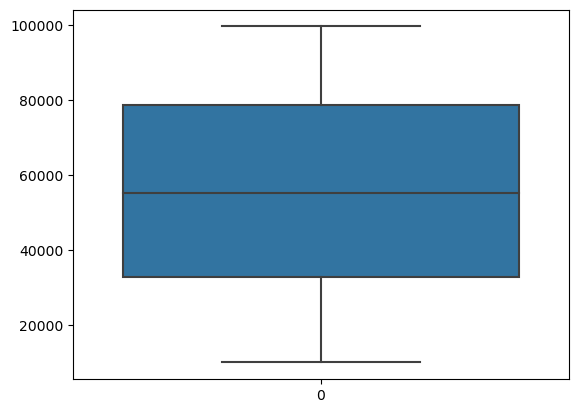

In [10]:
tax_plot = sns.boxplot(df['Tax'])

In [11]:
plt.rcParams['figure.figsize']=(16,6)
plt.rcParams['figure.dpi'] = 300

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


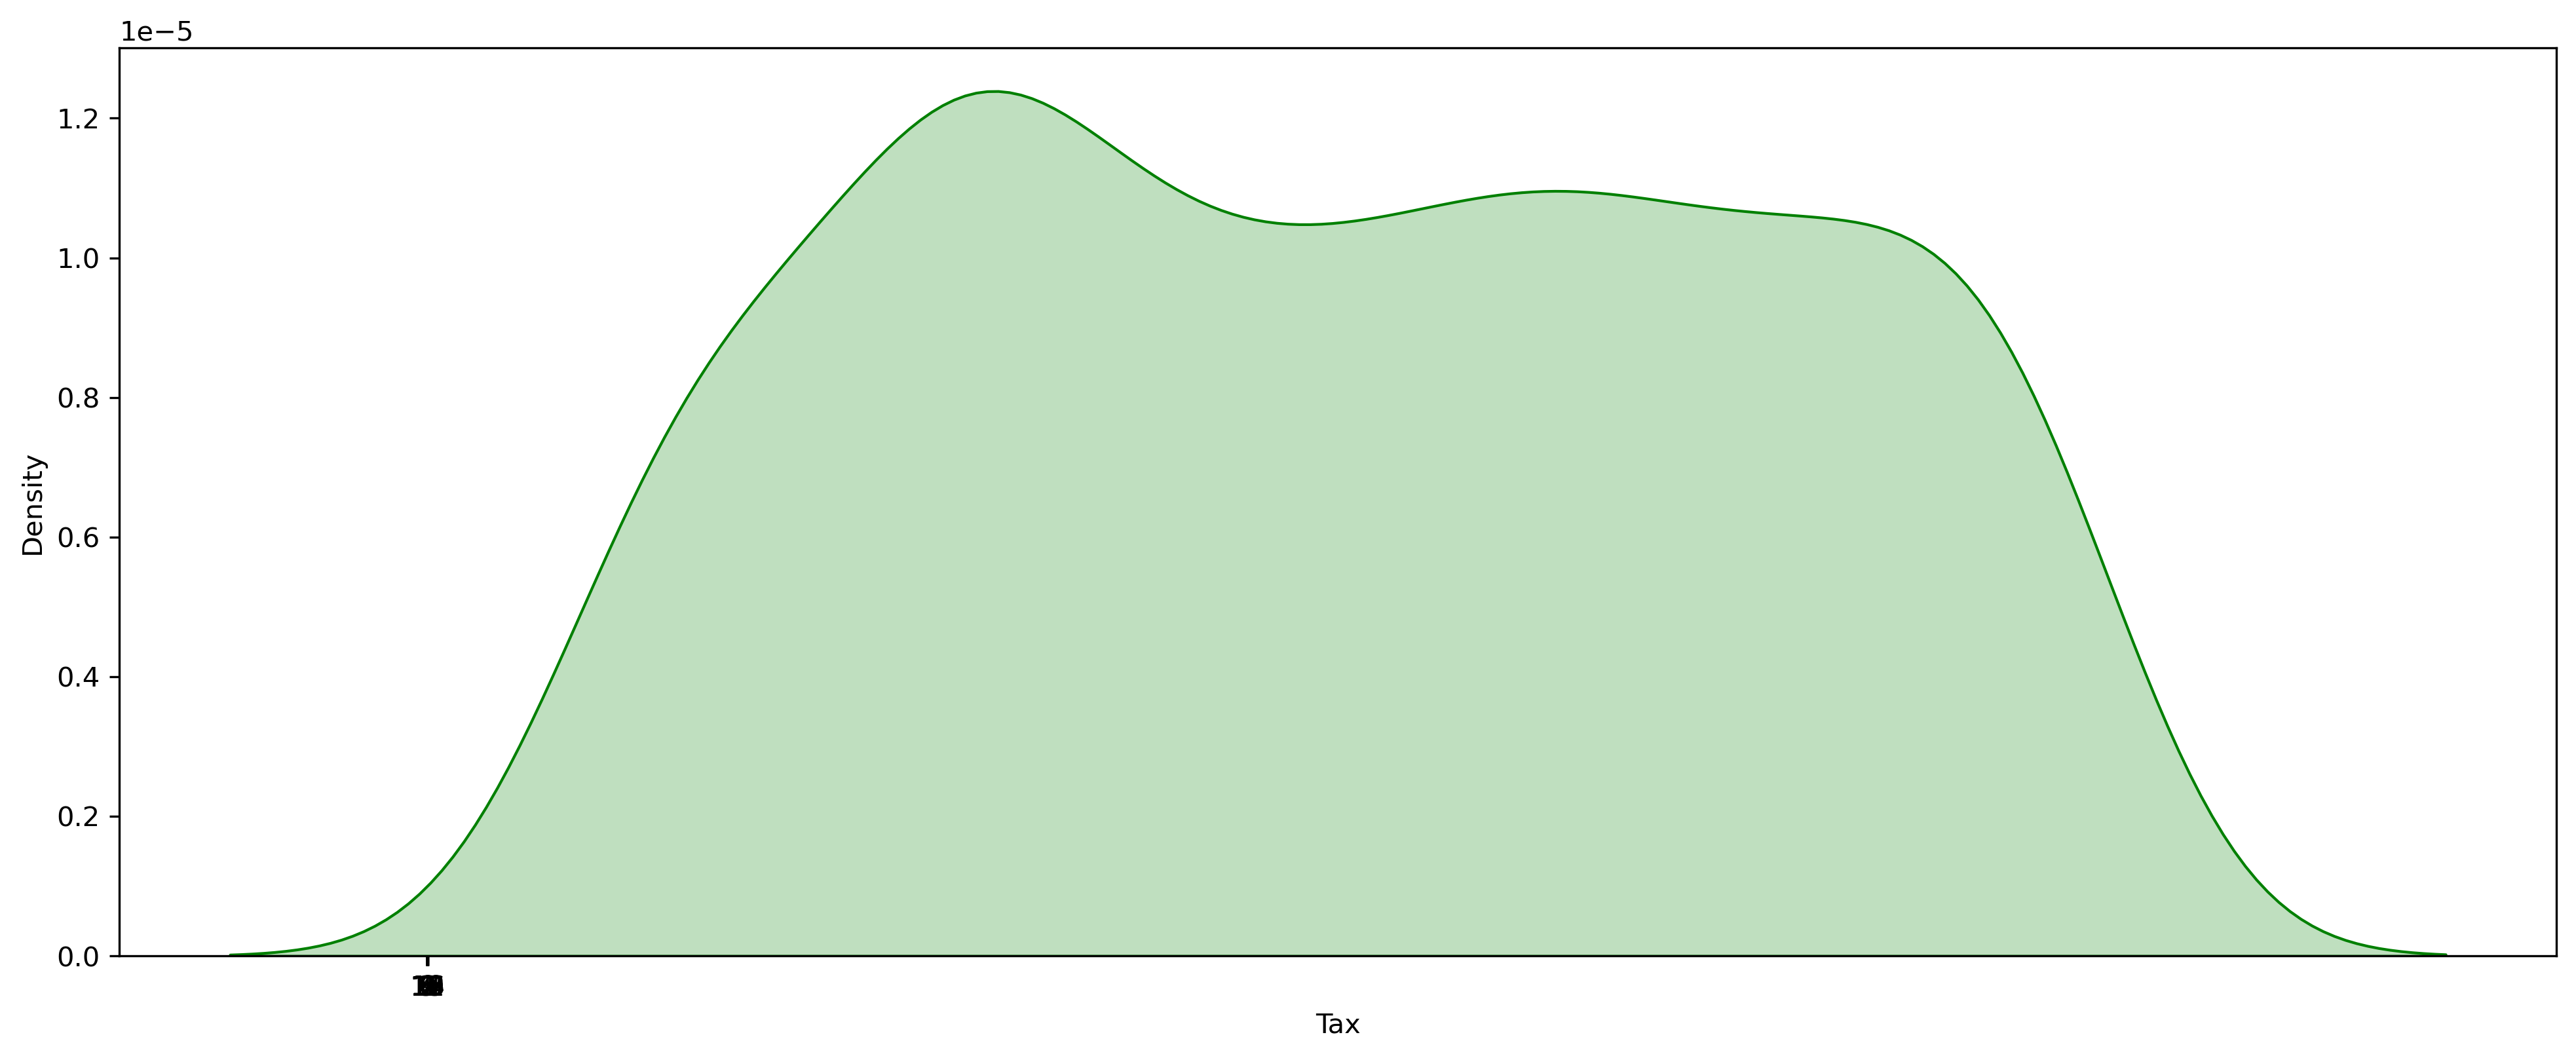

In [12]:
print("Skew: {}".format(df['Tax'].skew()))
print("Kurtosis: {}".format(df['Tax'].kurtosis()))

ax = sns.kdeplot(df['Tax'],fill=True,color='g')
plt.xticks([i for i in range(0,20,1)])

plt.show()

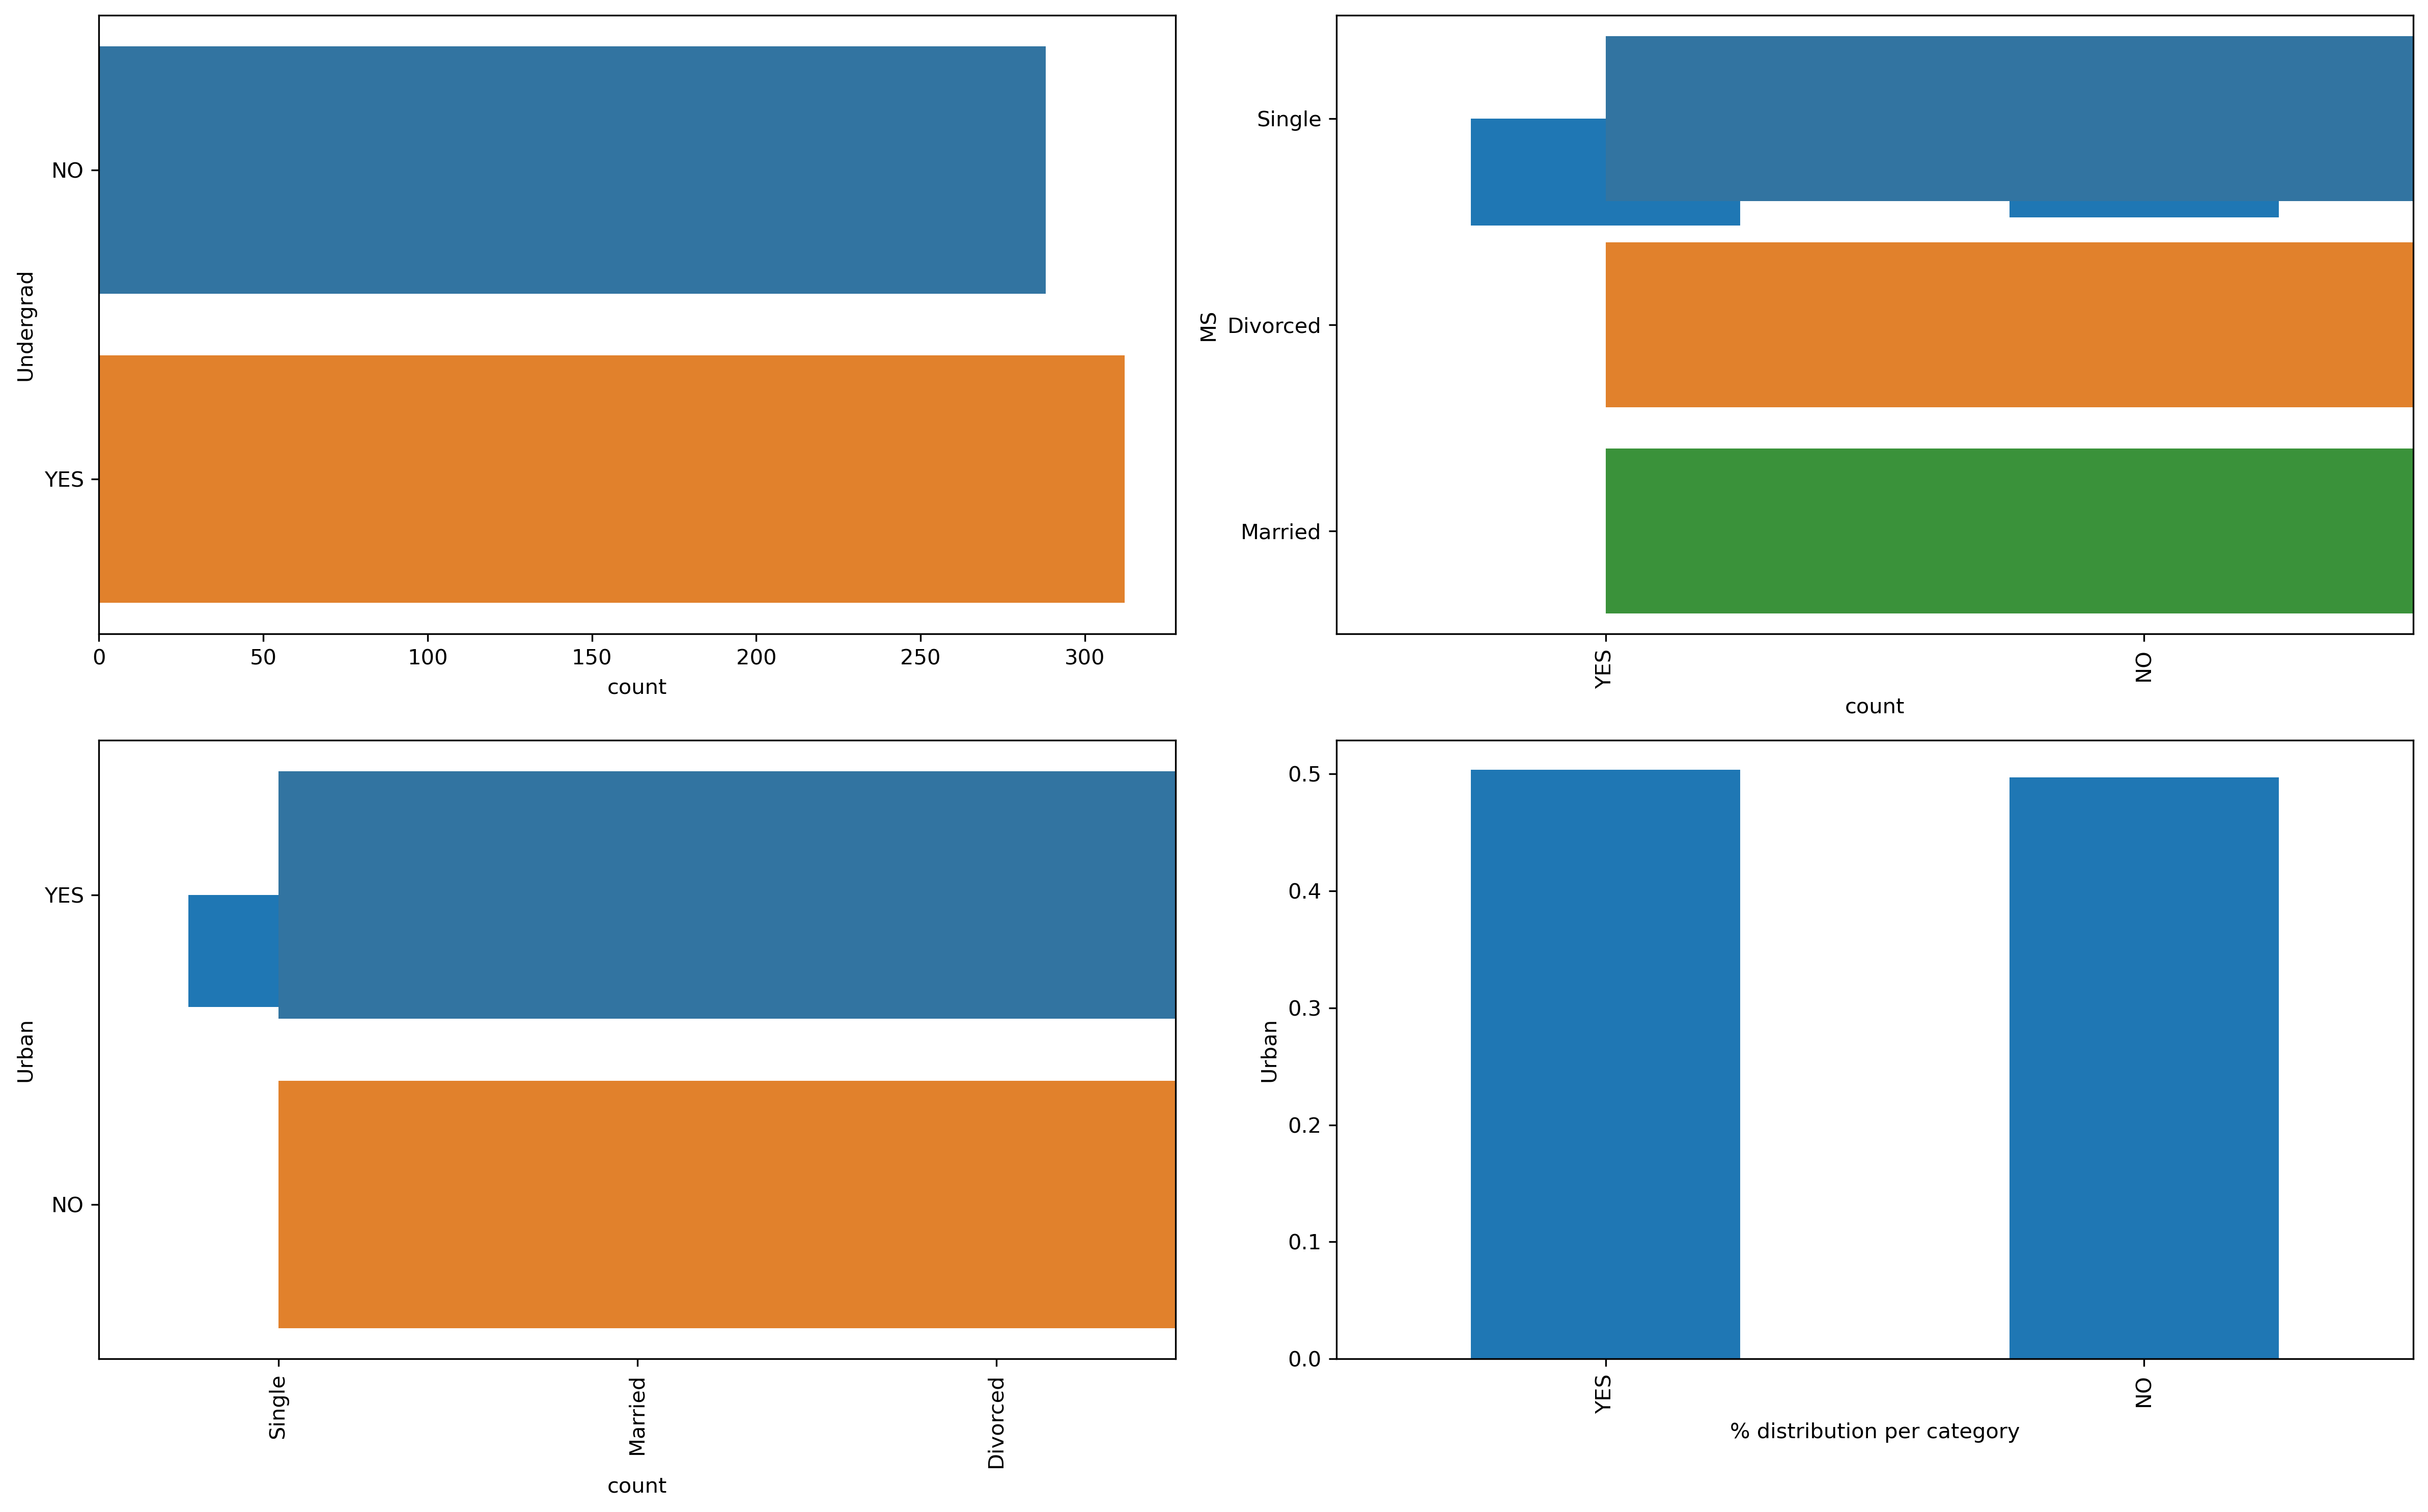

In [13]:
plt.figure(figsize=(16,10))

for i,col in enumerate(['Undergrad', 'MS', 'Urban'],1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
    
plt.tight_layout()
plt.show()

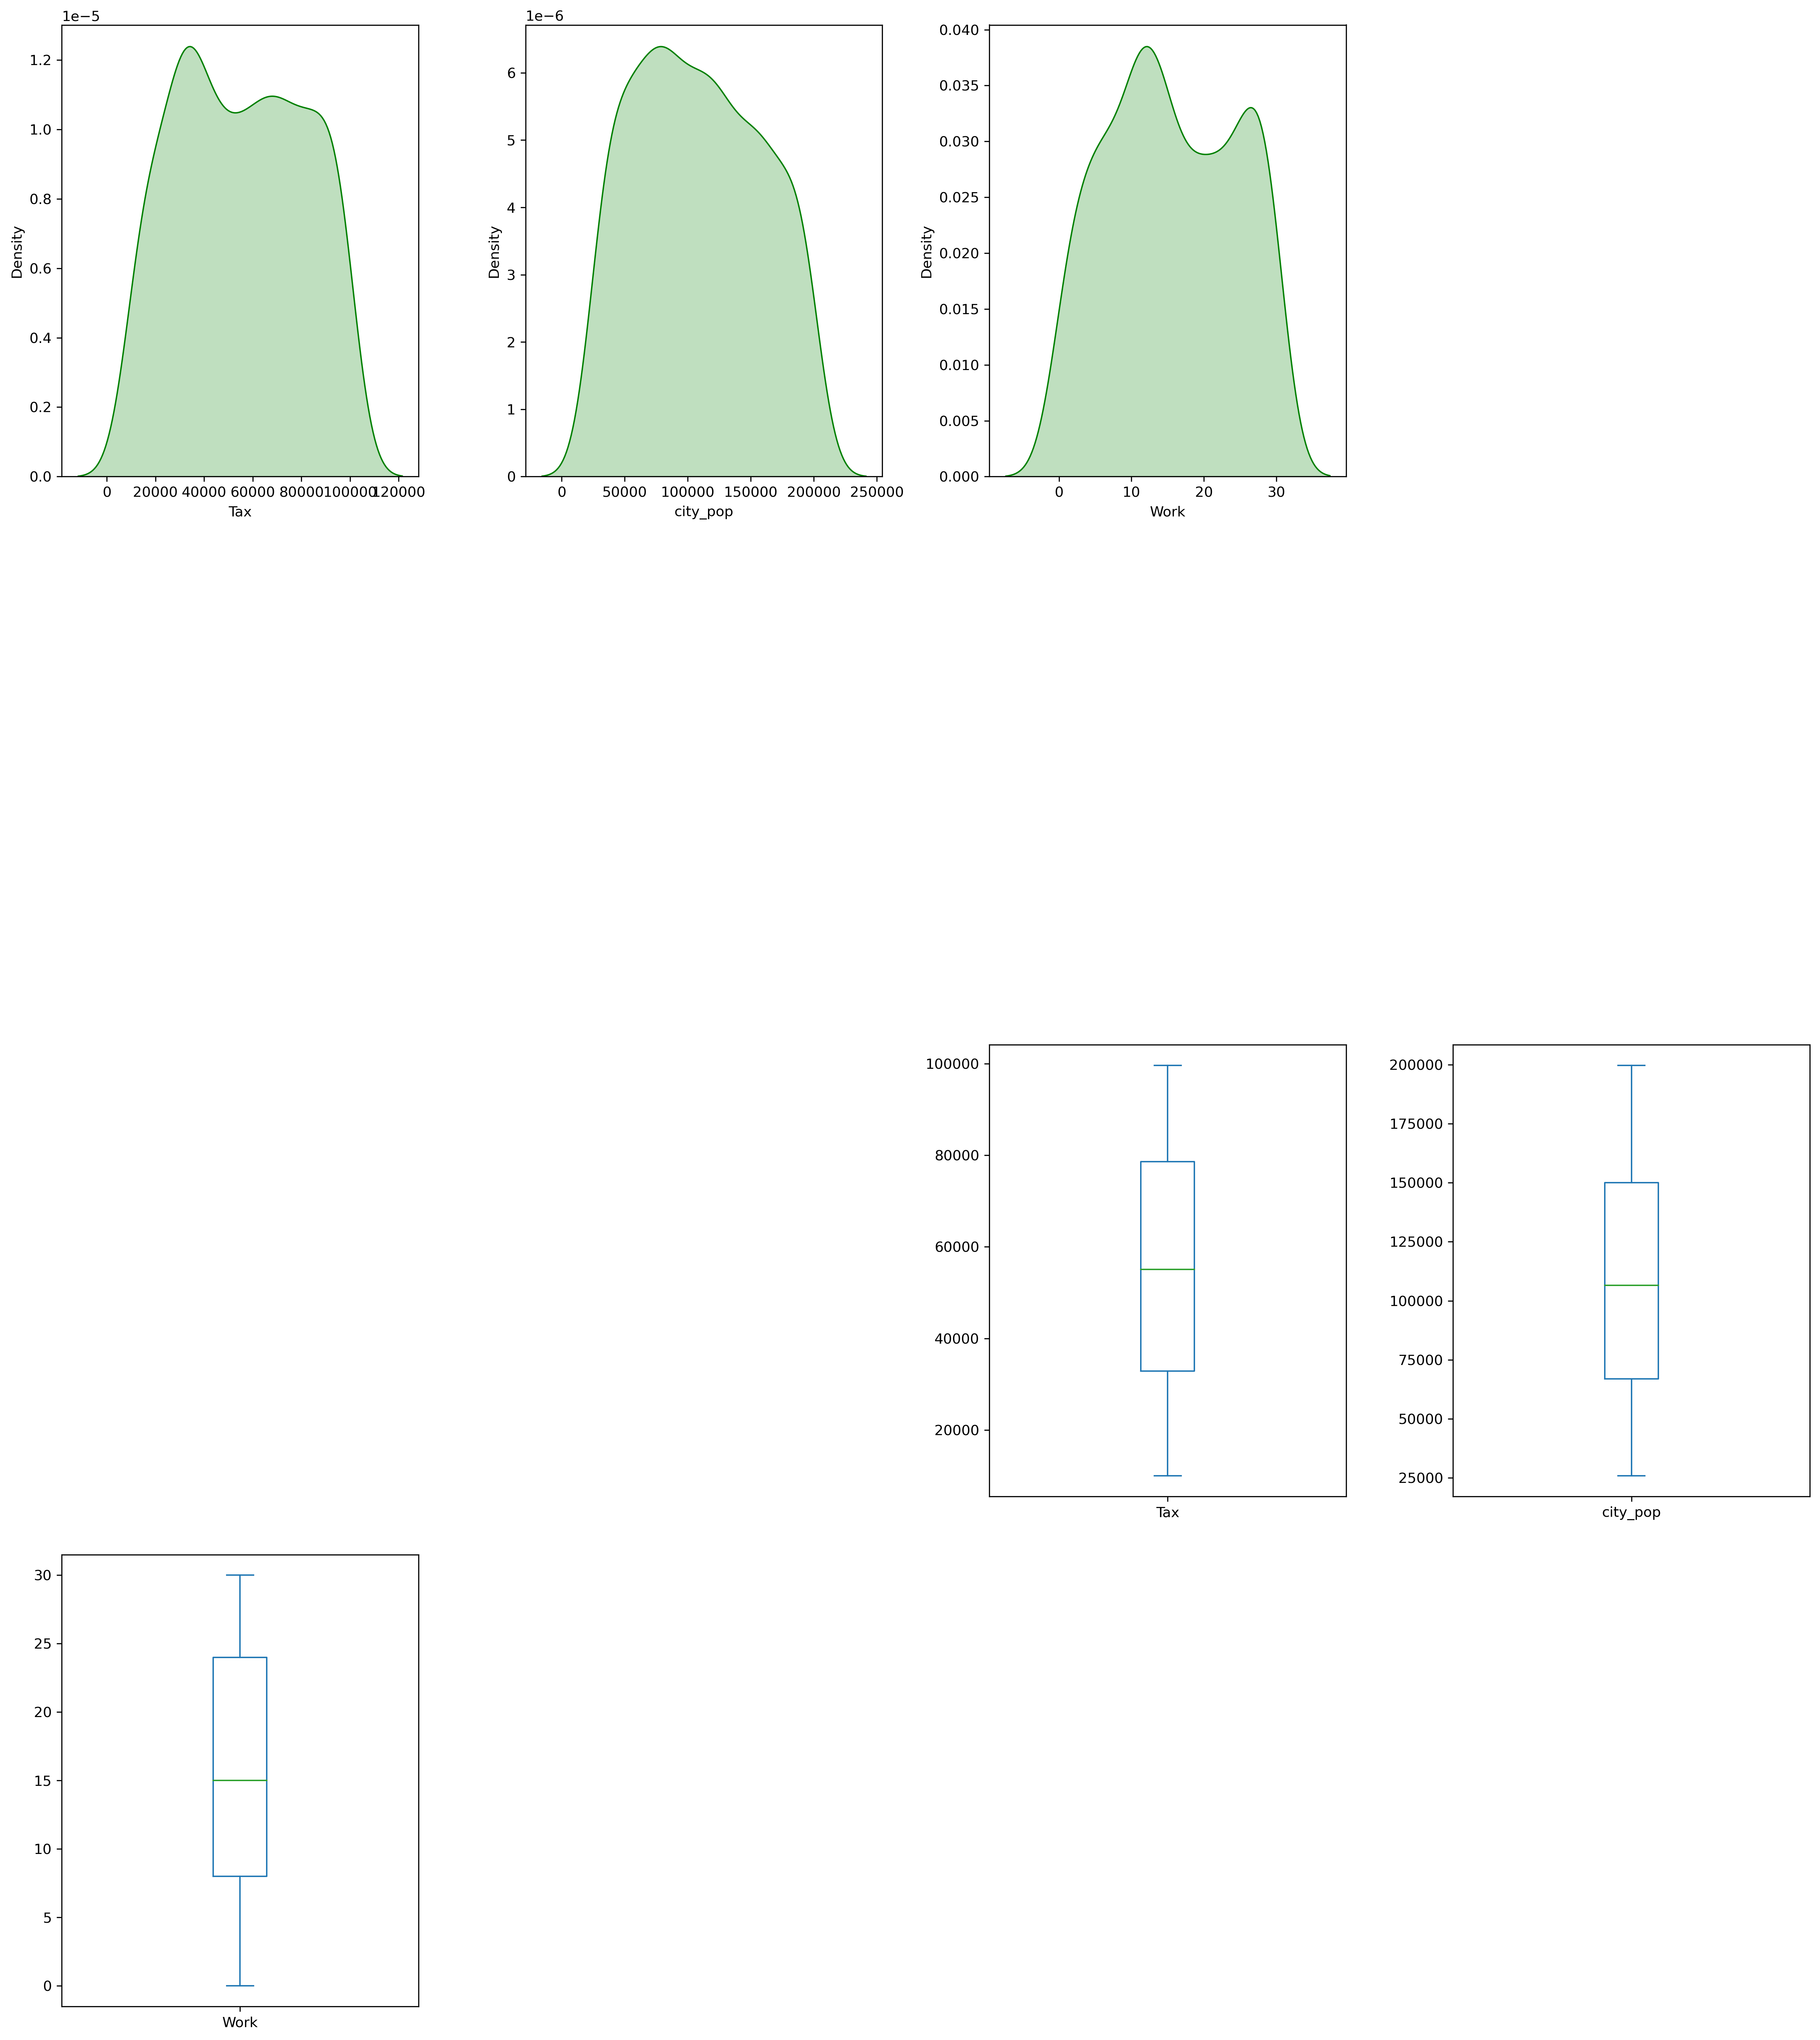

In [14]:
plt.figure(figsize=(18,40))

for i,col in enumerate(['Tax','city_pop','Work'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',fill=True)
    
    plt.subplot(8,4,i+10)
    df[col].plot.box()
    
plt.tight_layout() 
plt.show()

In [15]:
'''df['Tax'] = df.Tax.map(lambda x: 'Risky' if x<=30000
                      else 'Good')

df.head()'''

"df['Tax'] = df.Tax.map(lambda x: 'Risky' if x<=30000\n                      else 'Good')\n\ndf.head()"

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['MS'] = le.fit_transform(df['MS'])
df['Tax'] = le.fit_transform(df['Tax'])
df['Urban'] = le.fit_transform(df['Urban'])

In [17]:
df.head()

,Undergrad,MS,Tax,city_pop,Work,Urban
0,0,2,387,50047,10,1
1,1,0,163,134075,18,1
2,0,1,186,160205,30,1
3,1,2,272,193264,15,1
4,0,1,468,27533,28,0


In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

num_trees=200
max_features=6

kfold=KFold(n_splits=8,shuffle=True,random_state=6)

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result=cross_val_score(model,x,y,cv=kfold)
result.mean()

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [20]:
model=RandomForestClassifier(criterion="entropy")

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [22]:
pred_train=model.predict(x_train)

In [23]:
accuracy_score(y_train,pred_train)

1.0

In [24]:
confusion_matrix(y_train,pred_train)

array([[239,   0],
       [  0, 241]], dtype=int64)

In [25]:
pred_test=model.predict(x_test)

In [26]:
accuracy_score(y_test,pred_test)

0.5916666666666667

In [27]:
confusion_matrix(y_test,pred_test)

array([[33, 26],
       [23, 38]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57        59
           1       0.59      0.62      0.61        61

    accuracy                           0.59       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.59      0.59      0.59       120



In [29]:
print('Training accuracy: ', model.score(x_train,y_train))
print('Testing Accuracy: ', model.score(x_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.5916666666666667


In [30]:
df_t=pd.DataFrame({"Actual":y_test,"Predicted":pred_test})

In [31]:
df_t

,Actual,Predicted
205,1,1
380,0,0
165,1,1
257,1,0
309,1,1
...,...,...
597,1,1
343,0,1
244,0,1
209,1,0


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
rf = RandomForestClassifier()
param = {
    'criterion': ['entropy','gini'],
    'max_depth': [1,2,3,4,5,6]
}

In [34]:
grid = GridSearchCV(RandomForestClassifier(),param)

In [35]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [36]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [37]:
rf = RandomForestClassifier(criterion='gini', max_depth=5)
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [38]:
print('Training accuracy: ', rf.score(x_train,y_train))
print('Testing Accuracy: ', rf.score(x_test,y_test))

Training accuracy:  0.8125
Testing Accuracy:  0.6
